In [5]:
## Generic Function for plotting time complexity

import timeit
import matplotlib.pyplot as plt
import numpy as np
def plot_time_complexity(x_data, y_data, title, degree=2):

    print("\n Timing done. Fitting started.\n")
    # Fit a polynomial curve to the data
    coefficients = np.polyfit(x_data, y_data, degree)
    polynomial = np.poly1d(coefficients)
    fitted_curve = polynomial(x_data)

    # Plot the results
    plt.plot(x_data, y_data, marker='o', label='Actual Data', color='#8FB0CE')
    plt.plot(x_data, fitted_curve, label=f'Fitted Curve (Degree {degree})', color="#3E4C59")
    plt.title(title)
    plt.xlabel('Input Size')
    plt.ylabel('Computation Time (seconds)')
    plt.legend()
    plt.show()


In [2]:
import random
import sys

def generate_random_input_data(num_elements):
    input_data = []
    for i in range(1, num_elements + 1):
        # Generate a random number with (i+1) digits
        random_number = random.randint(10**i, 10**(i + 1) - 1)
        input_data.append(random_number)

        # Print progress message without a newline, flush the output, and flush the standard output
        print(f"\rGenerating {i}th element", end='', flush=True)
        sys.stdout.flush()

    print("\nGeneration complete.")
    return input_data

Problem 1
---
Develop a program that efficiently determines the next higher permutation of a positive integer represented as a list of decimal digits. The next higher permutation is defined as the smallest integer greater than the given integer, while maintaining the same set of digits. Ensure that the program returns the result as a list of decimal digits. This task requires a careful consideration of algorithmic efficiency and precision in handling digit permutations, elevating the difficulty level of the problem. For example, the next higher permutation of 123542 is 124235.

In [3]:
def next_permutation(nums):
    # Find the first element from the right that is smaller than its next element
    i = len(nums) - 2
    while i >= 0 and nums[i] >= nums[i + 1]:
        i -= 1

    # If no such element is found, it means the given permutation is the highest
    if i == -1:
        return None

    # Find the smallest element to the right of 'i' that is greater than nums[i]
    j = len(nums) - 1
    while nums[j] <= nums[i]:
        j -= 1

    # Swap nums[i] and nums[j]
    nums[i], nums[j] = nums[j], nums[i]

    # Reverse the subarray to the right of 'i'
    nums[i + 1:] = reversed(nums[i + 1:])

    return nums

def find_next_permutation(number):
    # Convert the number to a list of digits
    nums = [int(digit) for digit in str(number)]

    # Find the next permutation
    next_perm = next_permutation(nums)

    # If the given permutation is already the highest, return None
    if next_perm is None:
        return None

    # Convert the list of digits back to an integer
    result = int(''.join(map(str, next_perm)))

    return result

# Example usage:
input_number = 123542
result = find_next_permutation(input_number)

if result is not None:
    print(f"The next higher permutation of {input_number} is {result}.")
else:
    print(f"{input_number} is already the highest permutation.")


The next higher permutation of 123542 is 124235.


In [4]:
input_data = generate_random_input_data(1000)
# plot_time_complexity(find_next_permutation, input_data, 'Time Complexity of find_next_permutation')

Generating 1000th element
Generation complete.


In [5]:
# Initialize lists to store input sizes and corresponding computation times
input_sizes = []
computation_times = []
for index, data in enumerate(input_data):
    # Measure the time taken to execute the function with the given input data
    time_taken = timeit.timeit(lambda: find_next_permutation(data), number=1000)
    print(f"\rTiming {index+1}th element", end='', flush=True)
    # Store input size and corresponding computation time
    input_sizes.append(len(str(data)))
    computation_times.append(time_taken)


Timing 1000th element


 Timing done. Fitting started.



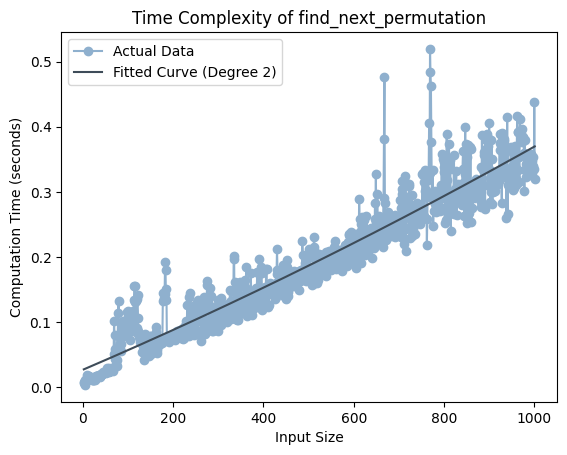

In [6]:
plot_time_complexity(input_sizes, computation_times, 'Time Complexity of find_next_permutation')

Problem 2
---
Develop a program that systematically generates the sequence of moves required to transfer a set of N discs from an initial arrangement on one pole to a target arrangement on another pole. The setup involves multiple poles and discs, each with varying diameters. The primary goal is to move all discs from the initial pole to the target pole while respecting two fundamental constraints: only the topmost disc on a pole can be moved at any given time, and no disc may be placed on a smaller disc. This programming task entails devising an algorithm capable of efficiently producing the sequence of moves, demonstrating heightened complexity due to the nuanced management of disc placements and strict adherence to the specified rules.

In [1]:
def tower_of_hanoi(n, source='SOURCE', target='TARGET', auxiliary='AUXILIARY'):
    if n == 1:
        #print(f"Move disk 1 from {source} to {target}")
        return
    tower_of_hanoi(n-1, source, auxiliary, target)
    #print(f"Move disk {n} from {source} to {target}")
    tower_of_hanoi(n-1, auxiliary, target, source)

In [18]:
input_list = list(range(3,25))

In [19]:
# Initialize lists to store input sizes and corresponding computation times
input_sizes = []
computation_times = []
for index, data in enumerate(input_list):
    # Measure the time taken to execute the function with the given input data
    time_taken = timeit.timeit(lambda: tower_of_hanoi(data), number=1000)
    print(f"\rTiming {index+4}th element", end='', flush=True)
    # Store input size and corresponding computation time
    input_sizes.append(data)
    computation_times.append(time_taken)


Timing 25th element


 Timing done. Fitting started.



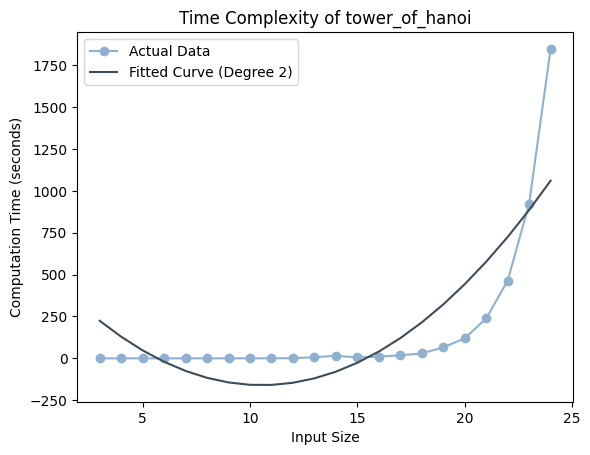

In [20]:
plot_time_complexity(input_sizes, computation_times, 'Time Complexity of tower_of_hanoi')

In [21]:
import random
import math

def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(route, cities):
    distance = 0
    for i in range(len(route) - 1):
        distance += euclidean_distance(cities[route[i]], cities[route[i + 1]])
    distance += euclidean_distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
    return distance

def hill_climbing_tsp(cities, iterations=1000):
    num_cities = len(cities)
    current_route = list(range(num_cities))
    random.shuffle(current_route)  # Random initial solution

    for _ in range(iterations):
        # Generate a neighboring solution by swapping two random cities
        neighbor_route = current_route.copy()
        index1, index2 = random.sample(range(num_cities), 2)
        neighbor_route[index1], neighbor_route[index2] = neighbor_route[index2], neighbor_route[index1]

        # Evaluate the total distance of the current and neighboring routes
        current_distance = total_distance(current_route, cities)
        neighbor_distance = total_distance(neighbor_route, cities)

        # Accept the neighboring solution if it's better
        if neighbor_distance < current_distance:
            current_route = neighbor_route

    return current_route

# Example usage:
cities = [(0, 0), (1, 2), (3, 1), (4, 3)]
optimal_route = hill_climbing_tsp(cities)

print("Optimal route:", optimal_route)
print("Optimal distance:", total_distance(optimal_route, cities))


Optimal route: [2, 3, 1, 0]
Optimal distance: 10.79669127533634


In [22]:
class State:
    def __init__(self, jug_3, jug_4):
        self.jug_3 = jug_3
        self.jug_4 = jug_4

    def __eq__(self, other):
        return self.jug_3 == other.jug_3 and self.jug_4 == other.jug_4

    def __hash__(self):
        return hash((self.jug_3, self.jug_4))

def water_jug_dfs(initial_state, target_amount):
    stack = [([initial_state], set())]

    while stack:
        current_path, visited_states = stack.pop()

        current_state = current_path[-1]

        if current_state.jug_4 == target_amount:
            return current_path

        visited_states.add(current_state)

        # Fill jug 3
        fill_3 = State(3, current_state.jug_4)
        if fill_3 not in visited_states:
            stack.append((current_path + [fill_3], visited_states))

        # Fill jug 4
        fill_4 = State(current_state.jug_3, 4)
        if fill_4 not in visited_states:
            stack.append((current_path + [fill_4], visited_states))

        # Empty jug 3
        empty_3 = State(0, current_state.jug_4)
        if empty_3 not in visited_states:
            stack.append((current_path + [empty_3], visited_states))

        # Empty jug 4
        empty_4 = State(current_state.jug_3, 0)
        if empty_4 not in visited_states:
            stack.append((current_path + [empty_4], visited_states))

        # Pour water from jug 3 to jug 4
        pour_3_to_4 = State(max(0, current_state.jug_3 - (4 - current_state.jug_4)), min(4, current_state.jug_4 + current_state.jug_3))
        if pour_3_to_4 not in visited_states:
            stack.append((current_path + [pour_3_to_4], visited_states))

        # Pour water from jug 4 to jug 3
        pour_4_to_3 = State(min(3, current_state.jug_3 + current_state.jug_4), max(0, current_state.jug_4 - (3 - current_state.jug_3)))
        if pour_4_to_3 not in visited_states:
            stack.append((current_path + [pour_4_to_3], visited_states))

    return None

# Example usage:
initial_state = State(0, 0)
target_amount = 2

solution_path = water_jug_dfs(initial_state, target_amount)

if solution_path:
    print("Optimal sequence of moves:")
    for state in solution_path:
        print(f"Jug 3: {state.jug_3}, Jug 4: {state.jug_4}")
else:
    print("No solution found.")


Optimal sequence of moves:
Jug 3: 0, Jug 4: 0
Jug 3: 0, Jug 4: 4
Jug 3: 3, Jug 4: 1
Jug 3: 3, Jug 4: 0
Jug 3: 0, Jug 4: 3
Jug 3: 3, Jug 4: 3
Jug 3: 2, Jug 4: 4
Jug 3: 2, Jug 4: 0
Jug 3: 0, Jug 4: 2


In [35]:
from collections import deque

# Constants for player marks
PLAYER_X = 1
PLAYER_O = 2

# Constants for board size
BOARD_SIZE = 3

# Move table with precomputed moves
MOVE_TABLE = [
    [0, 0, 0, 0, 1, 0, 0, 0, 0],  # Move 1
    [0, 0, 0, 2, 0, 0, 0, 0, 0],  # Move 2
    [0, 0, 0, 0, 0, 1, 0, 0, 0],  # Move 3
    [0, 0, 0, 0, 0, 0, 0, 2, 0],  # Move 4
]

# Representing a Tic-Tac-Toe board
class TicTacToeBoard:
    def __init__(self, board=None):
        if board is None:
            self.board = [0] * (BOARD_SIZE ** 2)
        else:
            self.board = board

    def __repr__(self):
        result = ""
        for i in range(BOARD_SIZE):
            result += " ".join(map(str, self.board[i * BOARD_SIZE:(i + 1) * BOARD_SIZE])) + "\n"
        return result

    def make_move(self, move):
        for i in range(BOARD_SIZE ** 2):
            self.board[i] = MOVE_TABLE[move][i]

    def is_winner(self, player):
        # Check rows, columns, and diagonals
        for i in range(BOARD_SIZE):
            if all(self.board[i * BOARD_SIZE + j] == player for j in range(BOARD_SIZE)) or \
               all(self.board[j * BOARD_SIZE + i] == player for j in range(BOARD_SIZE)):
                return True
        if all(self.board[i * (BOARD_SIZE + 1)] == player for i in range(BOARD_SIZE)) or \
           all(self.board[i * (BOARD_SIZE - 1) + (BOARD_SIZE - 1)] == player for i in range(BOARD_SIZE)):
            return True
        return False

# Breadth-First Search algorithm for Tic-Tac-Toe
def bfs_tic_tac_toe():
    visited_states = set()
    initial_board = TicTacToeBoard()

    queue = deque()
    queue.append((initial_board, PLAYER_X))

    while queue:
        current_board, current_player = queue.popleft()

        if tuple(current_board.board) in visited_states:
            continue

        visited_states.add(tuple(current_board.board))

        if current_board.is_winner(PLAYER_X) or current_board.is_winner(PLAYER_O):
            return current_board

        if all(cell != 0 for cell in current_board.board):
            continue

        for move in range(len(MOVE_TABLE)):
            new_board = TicTacToeBoard(current_board.board)
            new_board.make_move(move)

            next_player = PLAYER_O if current_player == PLAYER_X else PLAYER_X
            queue.append((new_board, next_player))

    return None

# Example usage:
result_board = bfs_tic_tac_toe()

if result_board:
    print("Optimal Tic-Tac-Toe Board:")
    print(result_board)
else:
    print("No solution found.")


No solution found.
